In [34]:
import numpy as np
import pandas as pd

In [35]:
train = pd.read_csv("../train.csv")
val = pd.read_csv("../val.csv")

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vectorizer = CountVectorizer() 

In [38]:
train_words = train.iloc[:,2]
train_labels = train.iloc[:,1]

In [39]:
def to_vec (arr): 
    one = [1, 0, 0, 0, 0]
    two = [0, 1, 0, 0, 0]
    three = [0, 0, 1, 0, 0]
    four = [0, 0, 0, 1, 0]
    five = [0, 0, 0, 0, 1]
    train_labels = []
    
    for i in range (0, arr.shape[0]): 
        x = arr.iloc[i]
        if x <= 0.2: 
            value = one
        elif x <= 0.4: 
            value = two
        elif x <= 0.6: 
            value = three
        elif x <= 0.8: 
            value = four 
        elif x <= 1:
            value = five
        else: 
            print(x)
            print(arr.iloc[x])
            assert(1 == 2)
        
        train_labels.append(value)
    
    train_labels = pd.DataFrame(train_labels)
    return train_labels

In [40]:
train_labels = to_vec(train_labels)
train_features = vectorizer.fit_transform(train_words)
print(train_features.shape)
print(train_labels.shape)

(191385, 18018)
(191385, 5)


In [41]:
val_words = val.iloc[:,2]
val_labels = val.iloc[:,1]
val_labels = to_vec(val_labels)
val_features = vectorizer.transform(val_words)
print(val_labels.shape)
print(val_features.shape)

(23923, 5)
(23923, 18018)


In [42]:
from sklearn import preprocessing 
train_features = preprocessing.normalize(train_features)
val_features = preprocessing.normalize(val_features)

### SVM with Linear Kernel

In [43]:
from sklearn.svm import LinearSVC
from sklearn import svc
from sklearn.multiclass import OneVsRestClassifier

In [55]:
clf = OneVsRestClassifier(SVC(kernel='poly'))
clf.fit(train_features, train_labels)

NameError: name 'SVC' is not defined

In [45]:
val_pred = clf.predict(val_features)
val_pred = np.argmax(val_pred, axis=1)
val_pred = np.apply_along_axis(lambda x: x + 1, 0, val_pred)

In [46]:
val_labels.shape
val_labels = val_labels.to_numpy()
val_labels = np.argmax(val_labels, axis=1)
val_labels = np.apply_along_axis(lambda x: x + 1, 0, val_labels)

In [49]:
from sklearn.metrics import accuracy_score
train_pred = clf.predict(train_features)
accuracy_score(train_pred, train_labels)

0.5550121482874834

### Graphs

In [51]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rc
sns.set_style("white")
rc('text', usetex=True)

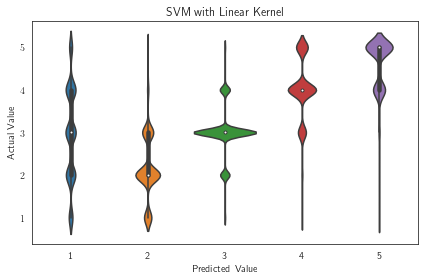

In [54]:
sns.violinplot(val_pred, val_labels)
plt.xlabel("Predicted Value", fontsize="medium")
plt.ylabel("Actual Value", fontsize="medium")
plt.title("SVM with Linear Kernel")
plt.tight_layout()
plt.savefig("visualization/SVM Linear.png", bbox_inches="tight", dpi=400)

In [56]:
train_pred = clf.predict(train_features)

In [57]:
accuracy_score(train_pred, train_labels)

0.5550121482874834